In [1]:
# [RDKitで合成難易度を評価して化合物をスクリーニング | 化学の新しいカタチ](https://future-chem.com/rdkit-sa-score/)
# https://future-chem.com/rdkit-sa-score/

In [30]:
from rdkit import rdBase, Chem
from rdkit.Chem import AllChem, Draw, PandasTools
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import HTML

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


In [26]:
# I added ./mylib/sascorer.py
import mylib.sascorer


In [28]:
df = pd.read_csv('./mylib/zim.100.txt', sep='\t')
df.head()

,smiles,Name,sa_score
0,Cc1c(C(=O)NCCO)[n+](=O)c2ccccc2n1[O-],ZINC21984717,3.166
1,Cn1cc(NC=O)cc1C(=O)Nc1cc(C(=O)Nc2cc(C(=O)NCCC(...,ZINC03872327,3.328
2,OC(c1ccncc1)c1ccc(OCC[NH+]2CCCC2)cc1,ZINC34421620,3.822
3,CC(C(=O)[O-])c1ccc(-c2ccccc2)cc1,ZINC00000361,2.462
4,C[NH+](C)CC(O)Cn1c2ccc(Br)cc2c2cc(Br)ccc21,ZINC00626529,3.577


,smiles,Name,sa_score,ROMol
0,Cc1c(C(=O)NCCO)[n+](=O)c2ccccc2n1[O-],ZINC21984717,3.166,
1,Cn1cc(NC=O)cc1C(=O)Nc1cc(C(=O)Nc2cc(C(=O)NCCC(N)=[NH2+])n(C)c2)n(C)c1,ZINC03872327,3.328,
2,OC(c1ccncc1)c1ccc(OCC[NH+]2CCCC2)cc1,ZINC34421620,3.822,
3,CC(C(=O)[O-])c1ccc(-c2ccccc2)cc1,ZINC00000361,2.462,
4,C[NH+](C)CC(O)Cn1c2ccc(Br)cc2c2cc(Br)ccc21,ZINC00626529,3.577,
5,NC(=[NH2+])NCC1COc2ccccc2O1,ZINC00000357,3.290,
6,CCC(C)(C)[NH2+]CC(O)COc1ccccc1C#N,ZINC04214111,3.698,
7,C[NH+](C)CC(O)Cn1c2ccc(Br)cc2c2cc(Br)ccc21,ZINC00626528,3.577,
8,CC12CCC3C(CCC4CC(=O)CCC43C)C1CCC2=O,ZINC04081985,3.912,
9,COc1ccc(OC(=O)N(CC(=O)[O-])Cc2ccc(OCCc3nc(-c4ccccc4)oc3C)cc2)cc1,ZINC03935839,2.644,

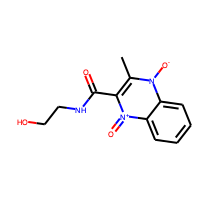
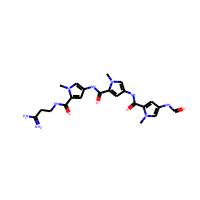
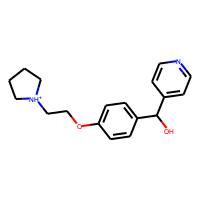
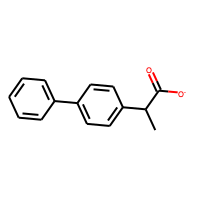
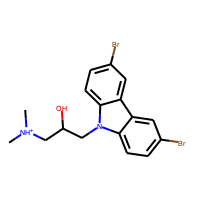
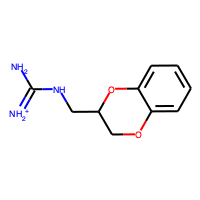
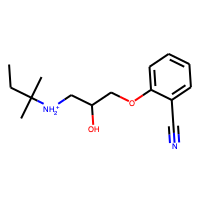
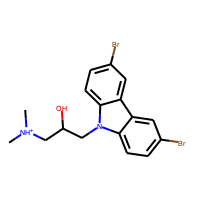
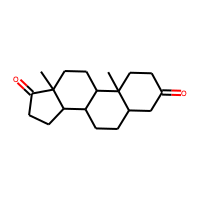
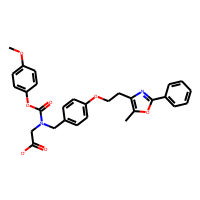
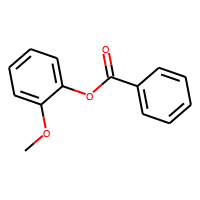
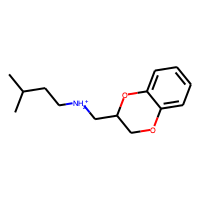
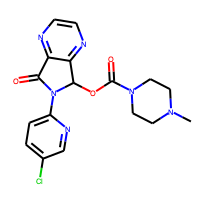
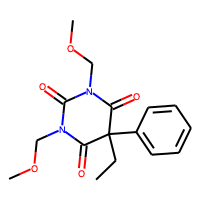
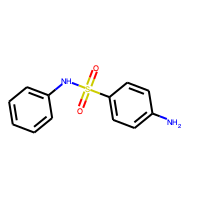
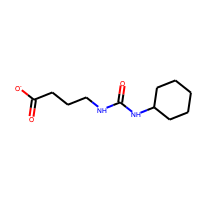
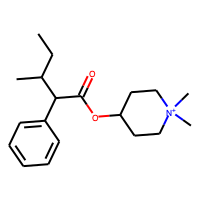
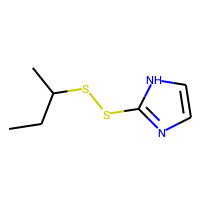
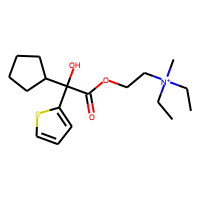
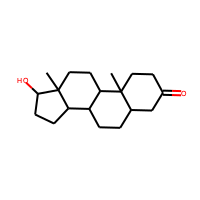
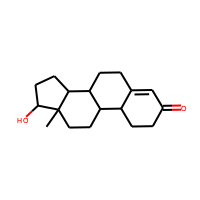
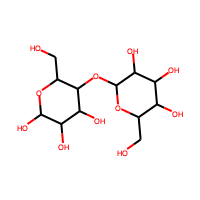
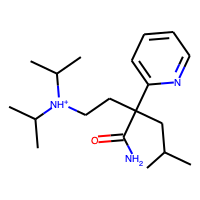
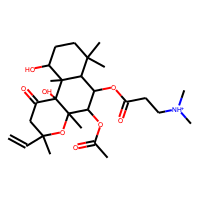
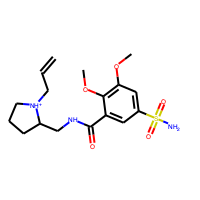
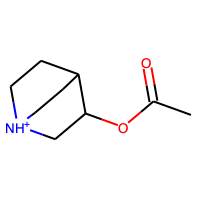
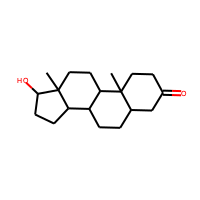
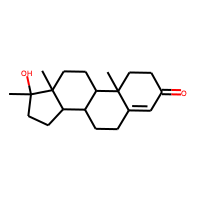
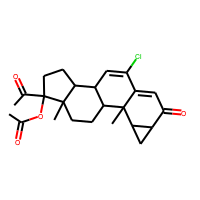
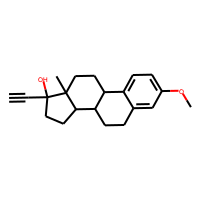
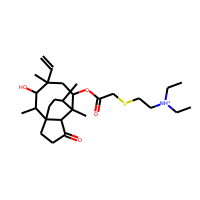
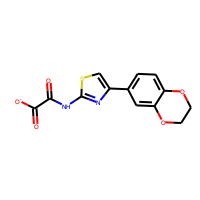
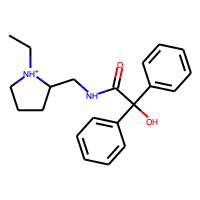
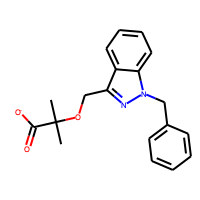
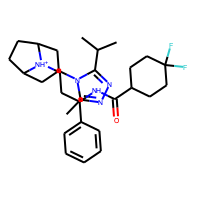
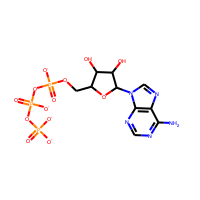
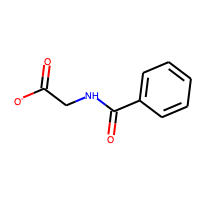
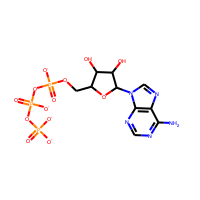
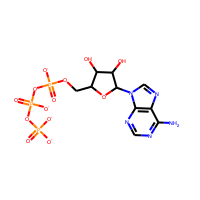
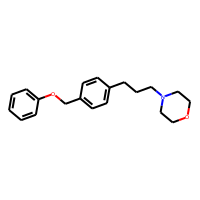
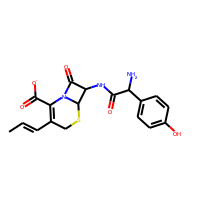
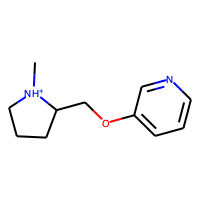
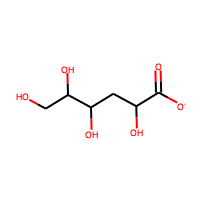
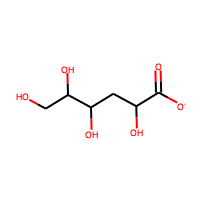
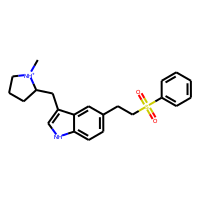
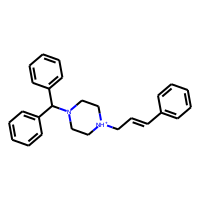
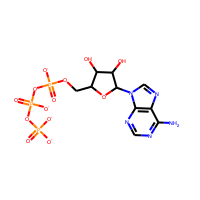
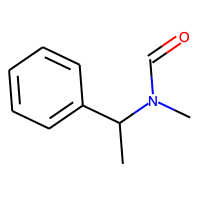
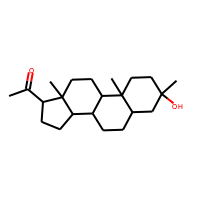
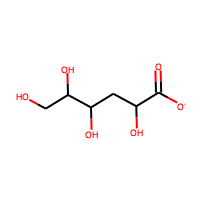
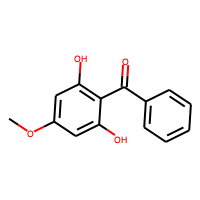
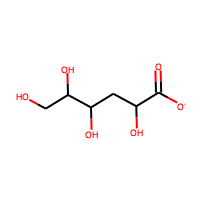
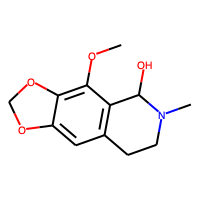
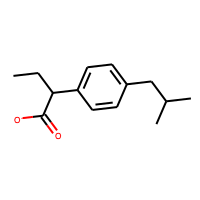
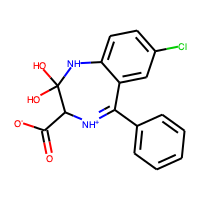
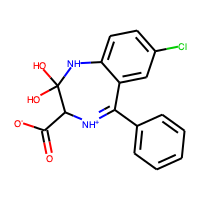
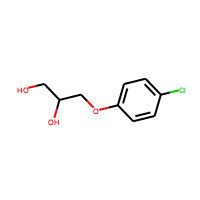
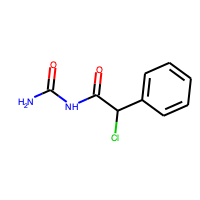
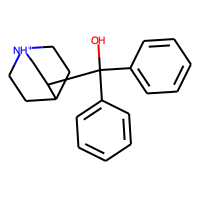
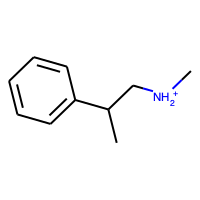
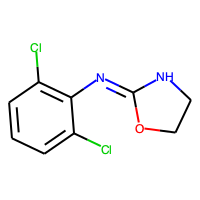
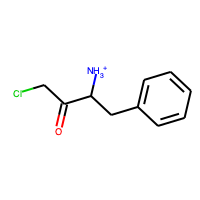
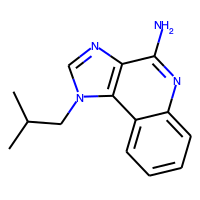
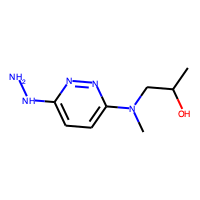
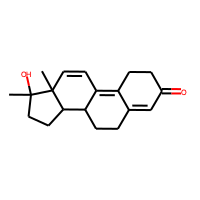
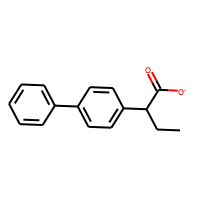
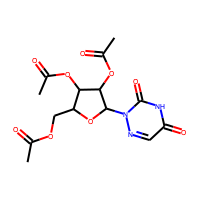
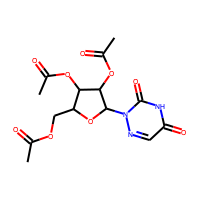
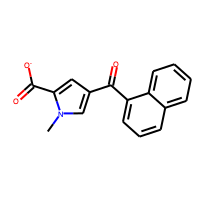
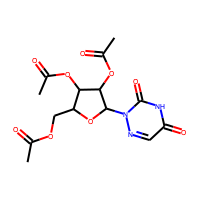
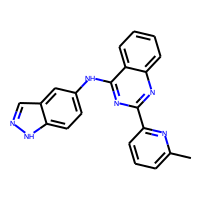
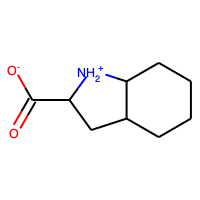
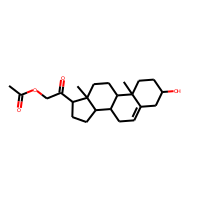
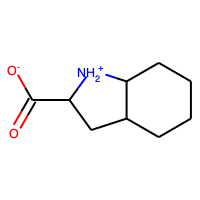
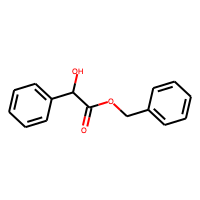
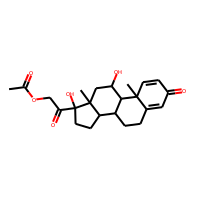
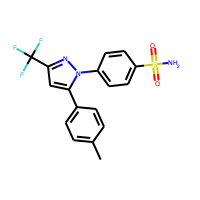
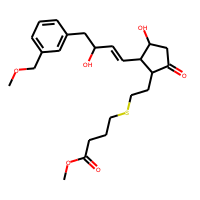
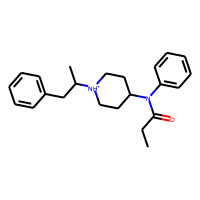
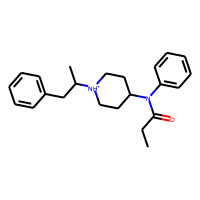
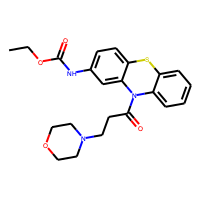
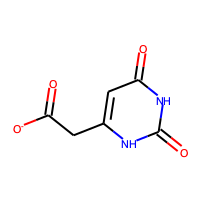
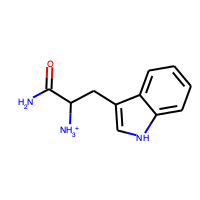
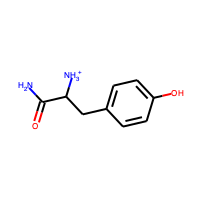
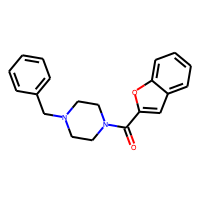
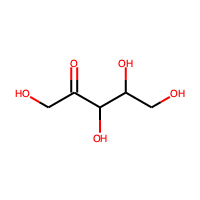
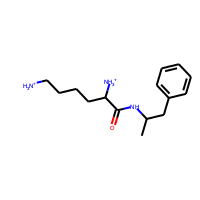
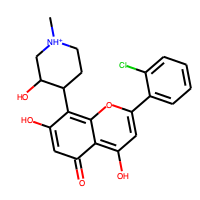
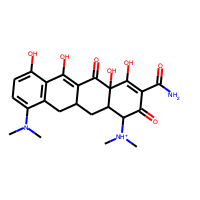
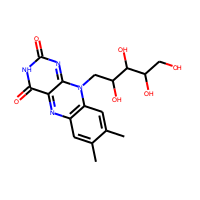
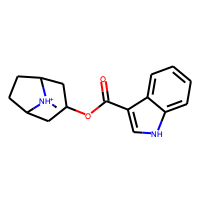
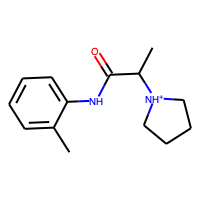
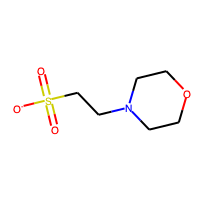
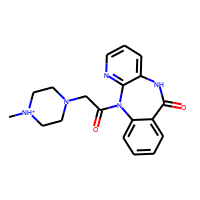
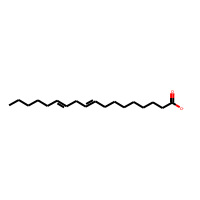
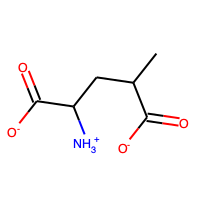
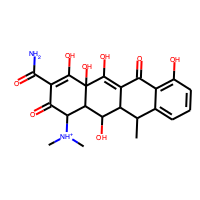
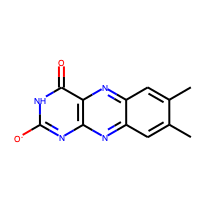
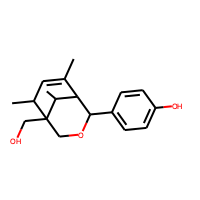
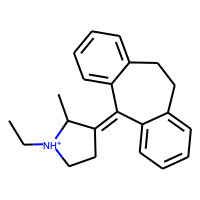

In [38]:
PandasTools.AddMoleculeColumnToFrame(frame=df, smilesCol='smiles')
HTML(df.to_html())

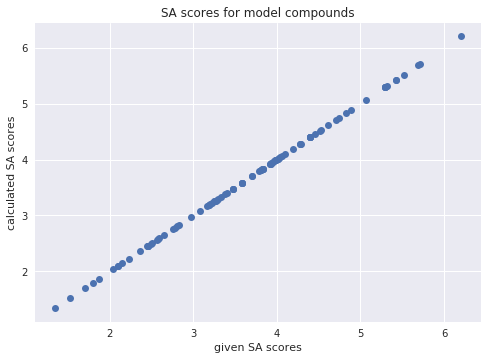

In [39]:
df['calc_SA_score'] = df.ROMol.map(sascorer.calculateScore)
x = df.sa_score
y = df.calc_SA_score
with mpl.style.context('seaborn'):
    plt.plot(x, y, 'o')
    plt.xlabel('given SA scores')
    plt.ylabel('calculated SA scores')
    plt.title('SA scores for model compounds')

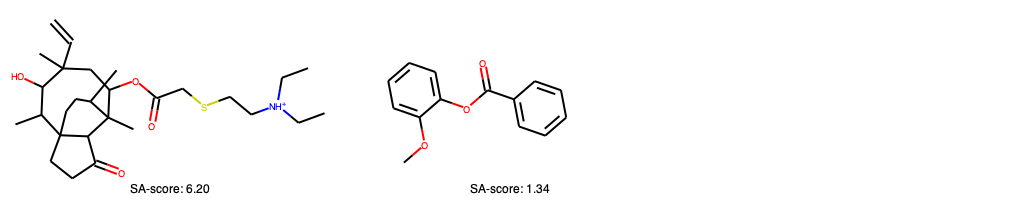

In [40]:
(id_max, id_min) = (df.sa_score.idxmax(), df.sa_score.idxmin())
sa_mols = [df.ROMol[id_max], df.ROMol[id_min]]
Draw.MolsToGridImage(sa_mols, subImgSize=(340, 200), legends=['SA-score: {:.2f}'.format(df.sa_score[i]) for i in [id_max, id_min]])